In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import neighbors
from toolbox_02450 import gausKernelDensity

In [2]:
#data = np.loadtxt('dataset.csv', skiprows=1, delimiter=',')
df = pd.read_csv('dataset.csv')
df = (df - df.mean()) / df.std()
data = df.as_matrix()

In [3]:
# Estimate the optimal kernel density width, by leave-one-out cross-validation
widths = np.linspace(0.2, 0.7, 100)
logP = np.zeros(np.size(widths))
for i,w in enumerate(widths):
    f, log_f = gausKernelDensity(data, w)
    logP[i] = log_f.sum()
val = logP.max()
ind = logP.argmax()

width=widths[ind]
print('Optimal estimated width is: {0}'.format(width))

Optimal estimated width is: 0.4525252525252525


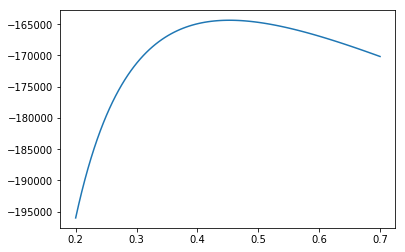

In [4]:
plt.plot(widths, logP)

In [5]:
# Estimate density for each observation not including the observation
# itself in the density estimate
density, log_density = gausKernelDensity(data, width)

# Sort the densities
i = (density.argsort(axis=0)).ravel()
density = density[i]

# Display the index of the lowest density data object
print('Lowest density: {0} for data object: {1}'.format(density[0],i[0]))
print('Highest density: {0} for data object: {1}'.format(density[-1],i[-1]))

Lowest density: [  2.28740126e-105] for data object: 67
Highest density: [  1.23356606e-21] for data object: 37


In [ ]:
print (density, i)

In [ ]:
K = 5
knn = neighbors.NearestNeighbors(n_neighbors = K)
knn.fit(df)
dist, ind = knn.kneighbors()
density = 1 / (np.sum(dist, axis=1) / K)
ard = density / (np.sum(density[ind], axis=1) / K)
print (np.min(density), np.max(density))
print (np.argmin(density), np.argmax(density))
print (np.min(ard), np.max(ard))
print (np.argmin(ard), np.argmax(ard))

0.0695302293156 0.282180341106
67 738
0.466714871636 1.18600313709
67 1114


In [ ]:
Ks = np.zeros(len(df))
maxK = 10
for i in range(len(df)):
    knn = neighbors.NearestNeighbors()
    knn.fit(df.drop(i))
    densities = np.zeros(len(df))
    for K in range(1, maxK + 1):        
        dist, ind = knn.kneighbors(n_neighbors = K)
        density = 1 / (np.sum(dist, axis=1) / K)
        densities[K] = np.sum(density)
#        print ('   ', i, K, densities[K])
    Ks[i] = np.argmax(densities)
    print (i, Ks[i])

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 1.0
6 1.0
